#### Carregamento de dados

In [1]:
%run bot_libraries.ipynb

In [2]:
data = pd.read_csv("CryptoBot_202103006Mv001.csv")

In [3]:
%run tratamento_de_dados.ipynb

#### Gráfico 'Open', 'High', 'Low', 'Close'

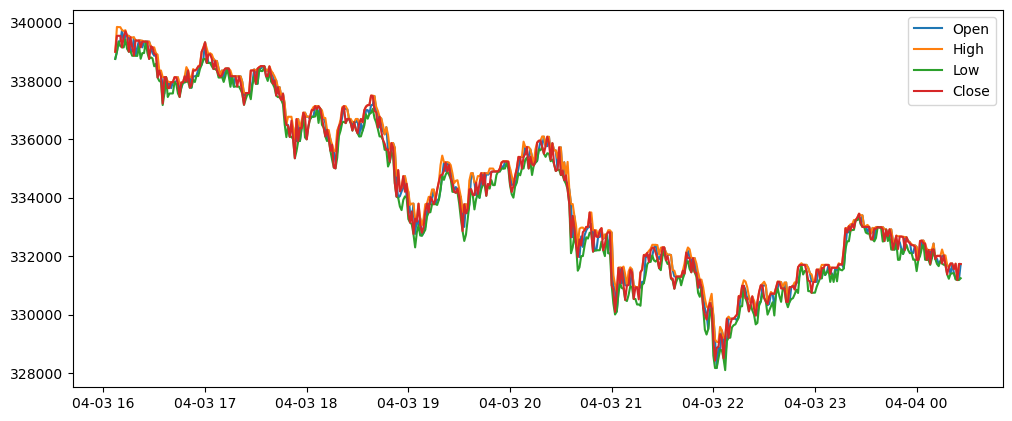

In [4]:
from matplotlib.pyplot import legend
from matplotlib import pylab
data_0 = data[['Open', 'High', 'Low', 'Close']]
plt.figure(figsize=(12,5), dpi=100)
line = plt.plot(data.index, data_0)
plt.legend(line, data_0.columns)

##### 5.1.14. T3 - Triple Exponential Moving Average (T3)

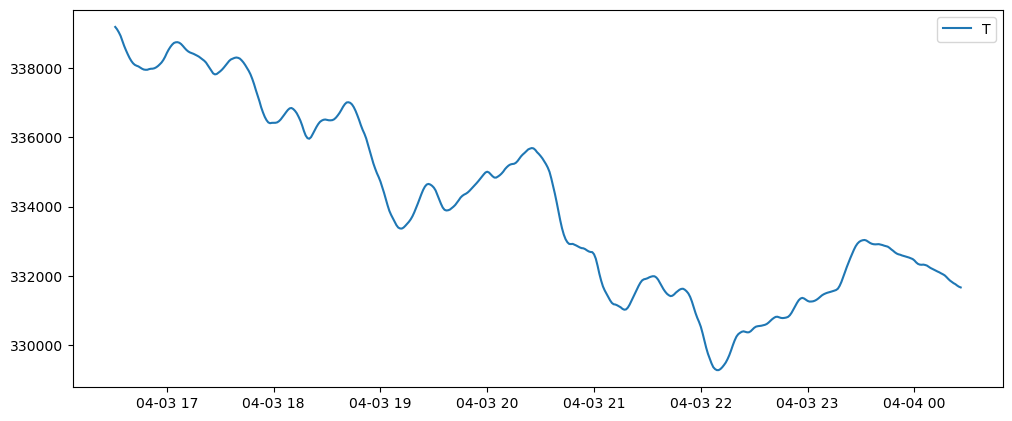

In [11]:
real = talib.T3(close, timeperiod=5, vfactor=0)
plt.figure(figsize=(12,5), dpi=100)
line = plt.plot(data.index, real)
plt.legend(line, *data_0.columns)

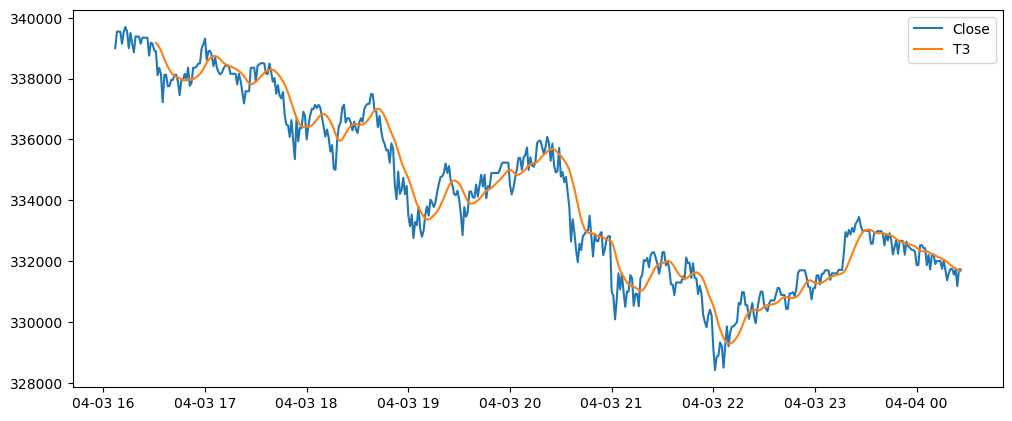

In [12]:
data_metric = pd.DataFrame({"T3": real})

data_0 = data_metric[["T3"]]
plt.figure(figsize=(12,5), dpi=100)



#Preço
data_p = pd.DataFrame()
data_p['Close'] = data['Close']
line_p = plt.plot(data_p.index, data_p)
# plt.legend(line_p, data_p.columns)


line = plt.plot(data_0.index, data_0)
plt.legend((*line_p, *line), (*data_p.columns, *data_0.columns))
plt.show()

#### Dataframe

In [13]:
data_metric = pd.DataFrame()
for i in range(len(data)):
    data_metric = data_metric.append({"Close": data['Close'][i], "T3": real[i]}, ignore_index = True)

In [14]:
data_metric_drop = data_metric.dropna().reset_index(drop = True)
data_metric_drop

Close                T3
0   338902.0000000000 339180.1030501851
1   338117.0000000000 339113.3527104245
2   338356.0000000000 339026.3300009996
3   338134.0000000000 338922.8128474141
4   337228.0000000000 338778.4753854729
..                ...               ...
471 331555.0000000000 331795.6705407565
472 331740.0000000000 331767.6500767125
473 331181.0000000000 331727.5605247976
474 331732.0000000000 331694.4529593879
475 331728.0000000000 331673.2400565901

[476 rows x 2 columns]

#### Loop de descisão de compra com a métrica escolhida